# 6.6 Sourcing & Analyzing Time-Series Data

## This notebook contains:

### 1. Import of librareis and data
### 2. Subsetting, wrangling, and cleaning time series data
### 3. Decomposition
### 4. Stationairity test
### 5. Stationarizing 

#### 1. Import of libraries and data 

In [67]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

warnings.filterwarnings('ignore') #Disable depracation warnings. 
plt.style.use('fivethirtyeight') #Styling option for plots

In [69]:
path = 'C:/Users/C SaiVishwanath/Documents/CF/Data Immersion/Achievement 6'

In [71]:
df = pd.read_csv(os.path.join(path, '02_Data', 'Prepared', '130425_mass_shoot_merged_derived_ver3.csv'), index_col = False, encoding='latin1')

In [73]:
#Plot data using matplotlib
plt.figure(figsize=(15,5), dpi=100)
plt.show()

<Figure size 1500x500 with 0 Axes>

In [75]:
df.dtypes

Incident_ID               int64
Date                     object
Year                      int64
Month                     int64
State                    object
City                     object
Victims_Killed            int64
Victims_Injured           int64
Suspects_Killed           int64
Suspects_Injured          int64
Suspects_Arrested         int64
Year_Month_State         object
Handguns_Sold           float64
Long_Guns_Sold          float64
Total_Guns_Sold         float64
State_ID                 object
State_y                  object
County                   object
Lat                     float64
Long                    float64
Population              float64
Shootings_County          int64
Shootings_State           int64
Total_Harmed_Victims      int64
Any_Suspect_Arrested     object
dtype: object

#### 2. Subsetting, wrangling and cleaning time-series data

In [78]:
pd.set_option('display.max_columns', None)

In [80]:
df.head()

,Incident_ID,Date,Year,Month,State,City,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested,Year_Month_State,Handguns_Sold,Long_Guns_Sold,Total_Guns_Sold,State_ID,State_y,County,Lat,Long,Population,Shootings_County,Shootings_State,Total_Harmed_Victims,Any_Suspect_Arrested
0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,0,0,0,2025-4-Tennessee,0.0,0.0,0.0,TN,Tennessee,Shelby,35.1087,-89.9663,0.0,3,30,6,No
1,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,0,0,0,2025-4-Tennessee,0.0,0.0,0.0,FL,Florida,Manatee,27.5435,-82.5608,0.0,3,30,6,No
2,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,0,0,0,2025-4-Tennessee,0.0,0.0,0.0,TX,Texas,Hall,34.7268,-100.5416,0.0,3,30,6,No
3,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,0,0,0,2025-4-Tennessee,0.0,0.0,0.0,MO,Missouri,Scotland,40.4613,-92.1704,0.0,3,30,6,No
4,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,0,0,0,2025-4-Tennessee,0.0,0.0,0.0,MI,Michigan,Macomb,42.8956,-82.7689,0.0,3,30,6,No


In [82]:
pd.set_option('display.max_rows', None)

In [84]:
df['Date'].value_counts(dropna=False)

Date
2024-03-31    467
2020-07-05    427
2022-07-17    273
2020-07-17    240
2020-05-23    240
2020-08-09    232
2024-05-27    219
2021-10-17    216
2024-06-09    201
2024-07-21    200
2020-08-16    198
2020-07-04    195
2015-06-13    194
2018-01-14    193
2024-06-23    189
2023-06-25    183
2022-04-29    180
2022-07-04    176
2023-06-18    176
2024-06-24    169
2022-08-28    167
2024-06-22    160
2023-05-31    159
2024-08-17    159
2018-08-20    156
2022-04-30    155
2020-08-30    155
2023-04-03    154
2020-06-11    154
2021-11-14    153
2023-08-27    150
2024-09-14    147
2016-12-24    146
2020-08-15    145
2023-09-06    142
2024-08-20    141
2024-04-14    139
2022-03-19    138
2017-10-21    138
2023-05-13    138
2020-06-30    138
2019-04-27    137
2023-08-13    137
2020-07-26    135
2022-06-11    135
2020-12-10    135
2016-10-28    135
2022-07-16    134
2024-02-11    134
2022-01-04    134
2015-09-27    134
2022-07-11    134
2016-05-21    134
2023-06-05    134
2020-04-15    134
2016-

In [86]:
pd.reset_option('display.max_rows')

In [88]:
df_sub = df[['Date', 'Shootings_State']]

In [90]:
#Setting 'Date' as index column

from datetime import datetime

df_sub['datetime'] = pd.to_datetime(df_sub['Date'])
df_sub = df_sub.set_index('datetime')
df_sub.drop(['Date'], axis=1, inplace=True)
df_sub.head()

,Shootings_State
datetime,
2025-04-09,30
2025-04-09,30
2025-04-09,30
2025-04-09,30
2025-04-09,30


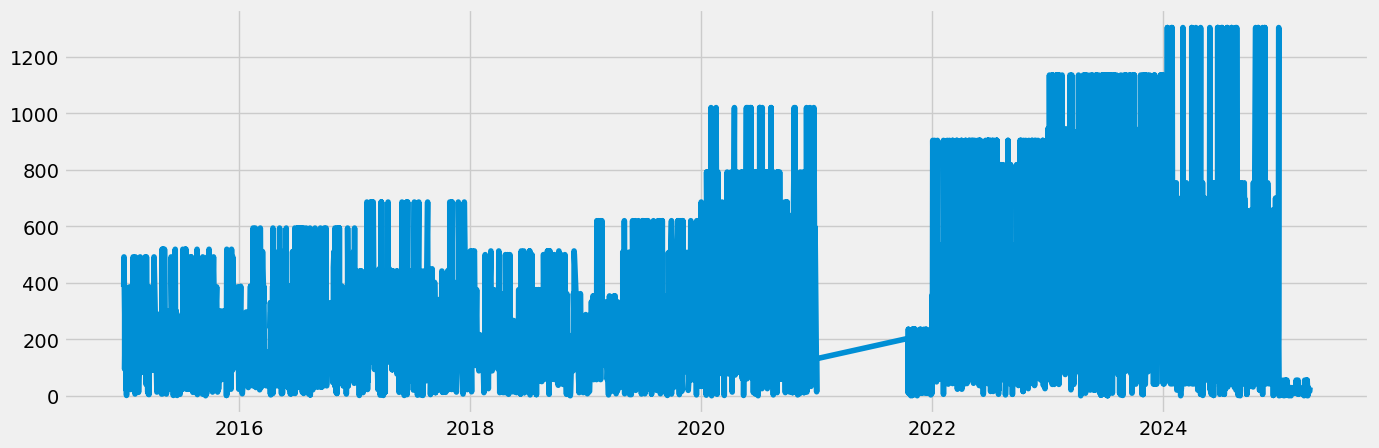

In [92]:
#Plot dataset

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [94]:
#Checking for missing values
df_sub.isnull().sum()

Shootings_State    0
dtype: int64

In [96]:
#Checking for duplicates
dups = df_sub.duplicated()
dups.sum()

64296

In [98]:
df_sub[df_sub.duplicated()]

,Shootings_State
datetime,
2025-04-09,30
2025-04-09,30
2025-04-09,30
2025-04-09,30
2025-04-09,30
...,...
2015-01-01,386
2015-01-01,386
2015-01-01,386


In [102]:
df_sub_clean = df_sub.drop_duplicates()

In [104]:
df_sub_clean[df_sub_clean.duplicated()]

,Shootings_State
datetime,


In [106]:
dups2 = df_sub_clean.duplicated()
dups2.sum()

0

#### 3. Decompostiion

In [109]:
#Decomposing time series using additive model
decomposition = sm.tsa.seasonal_decomposition(df_sub_clean, model='additive')

AttributeError: module 'statsmodels.tsa.api' has no attribute 'seasonal_decomposition'

In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_sub_clean, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [115]:
#Checking frequency of DateTimeIndex
print(df_sub_clean.index)
print(df_sub_clean.index.freq)

DatetimeIndex(['2025-04-09', '2025-04-08', '2025-04-05', '2025-04-02',
               '2025-03-31', '2025-03-30', '2025-03-29', '2025-03-29',
               '2025-03-29', '2025-03-22',
               ...
               '2015-12-20', '2015-12-12', '2015-12-08', '2015-11-29',
               '2015-11-24', '2015-11-22', '2015-11-08', '2015-09-27',
               '2015-07-25', '2015-07-19'],
              dtype='datetime64[ns]', name='datetime', length=232, freq=None)
None


In [117]:
#Resampling dataframe to monthly count
df_resampled = df_sub_clean.resample('M').sum()

In [119]:
df_resampled.head()

,Shootings_State
datetime,
2015-07-31,365
2015-08-31,0
2015-09-30,186
2015-10-31,0
2015-11-30,804


In [123]:
#Checking frequency of DateTimeIndex
print(df_resampled.index)
print(df_resampled.index.freq)

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30',
               ...
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
               '2025-03-31', '2025-04-30'],
              dtype='datetime64[ns]', name='datetime', length=118, freq='ME')
<MonthEnd>


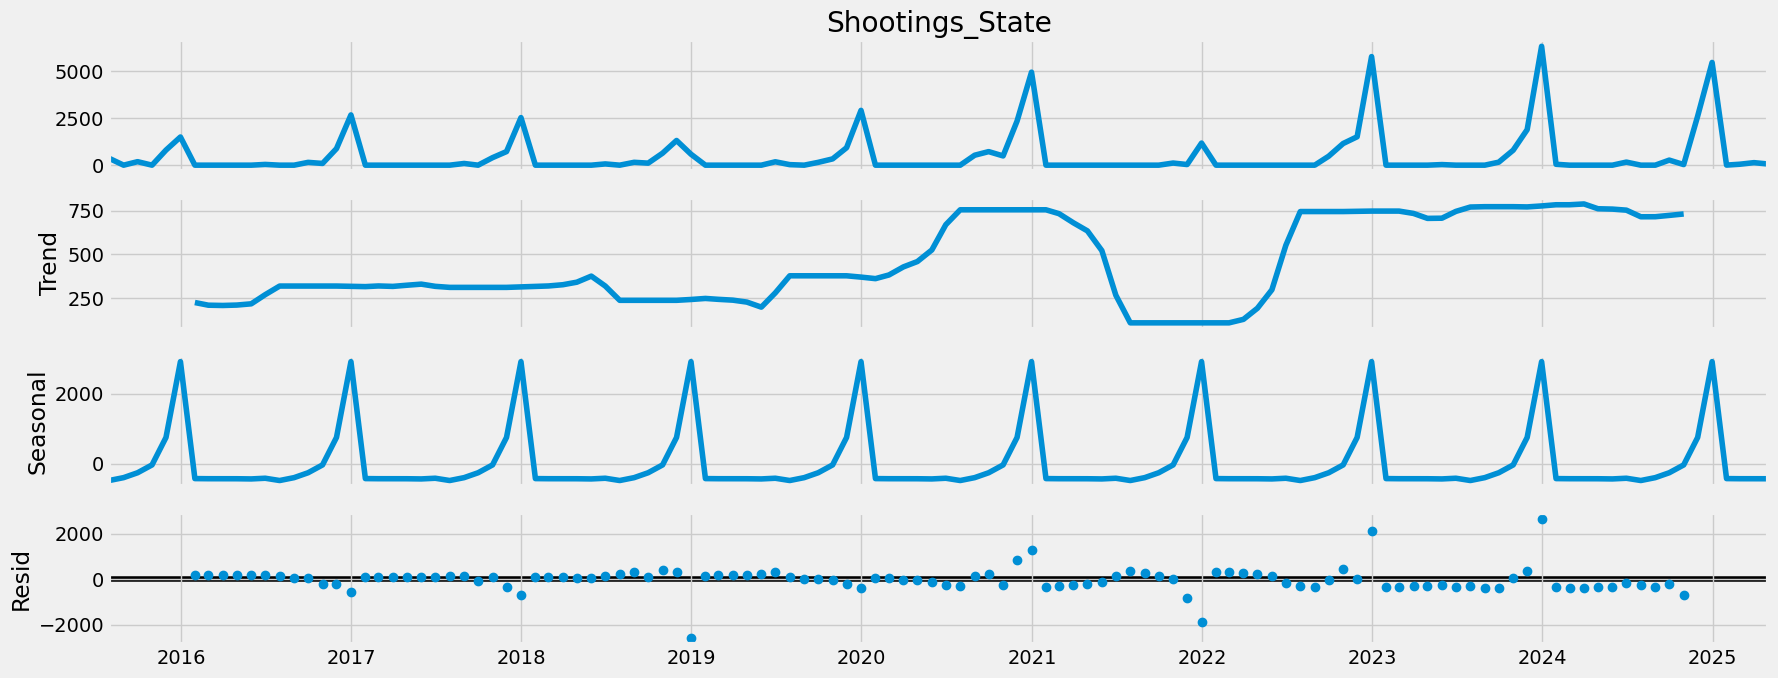

In [130]:
#Running decomposition again

#Defining fixed size for charts
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7


#Decompose time series with additive model
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_resampled['Shootings_State'], model='additive')
decomposition.plot()
plt.show()

##### Interpretation: The decomposition chart shows both trend and seasonality, meaning this dataset is non-stationary. 

#### 4. Testing for stationarity

In [137]:
#Import adfuller function
from statsmodels.tsa.stattools import adfuller

#Definining function
def dickey_fuller(timeseries):
    #Performing Dickey-Fuller test
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

#Applying test using function on time series
dickey_fuller(df_resampled['Shootings_State'])    

Dickey-Fuller Stationarity test:
Test Statistic                  -1.944334
p-value                          0.311501
Number of Lags Used             12.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64


##### Interpretation: As pressuposed in the results of the decomposition, the dataset is indeed non-stationary. This is proven by the fact H0 cannot be refuted because p-value = 0.31, which is more than the critical p-value= 0.05 that is needed to reject the hypothesis that there is no unit root. 

In [139]:
#Hypothesis cannot be rejected according to p-value

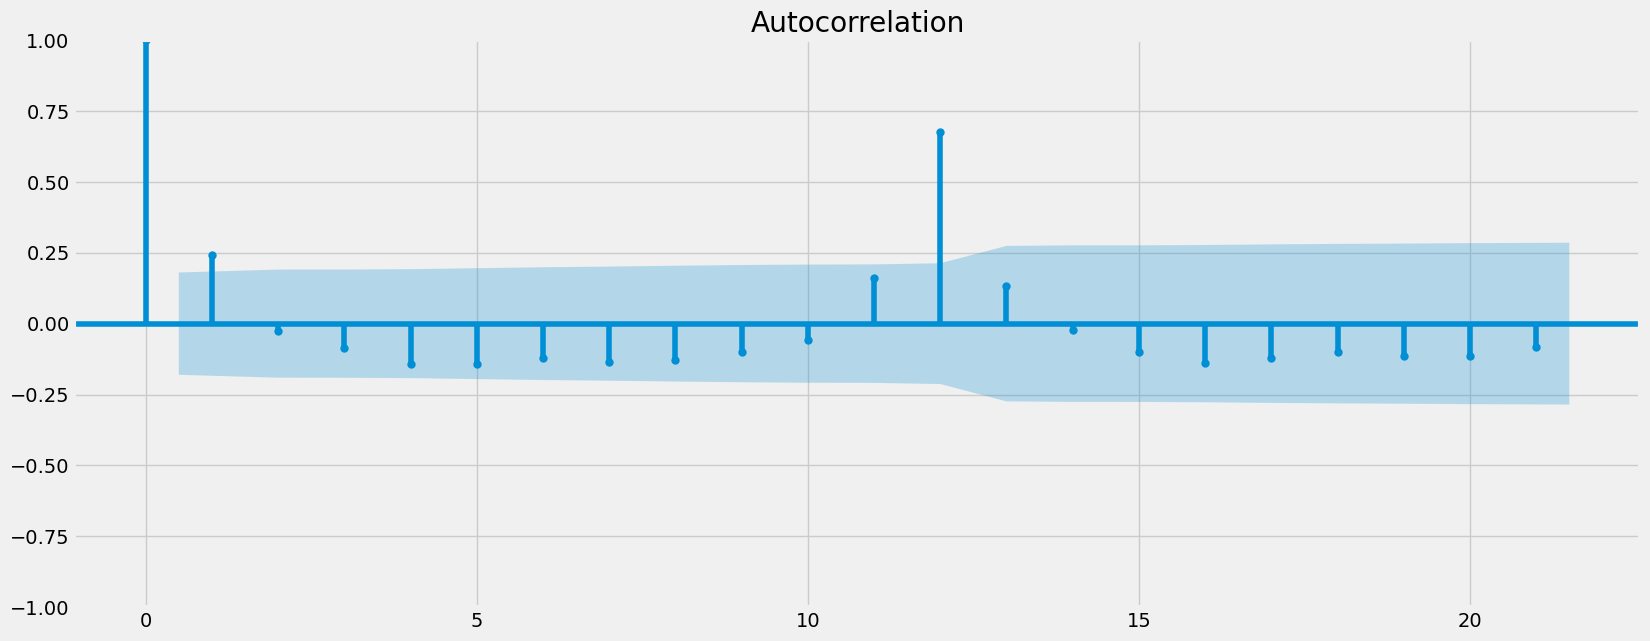

In [141]:
#Check plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_resampled)
plt.show()

#### 5. Stationarizing

In [144]:
data_diff = df_resampled - df_resampled.shift(1)

In [146]:
data_diff.dropna(inplace=True)

In [148]:
data_diff.head()

,Shootings_State
datetime,
2015-08-31,-365.0
2015-09-30,186.0
2015-10-31,-186.0
2015-11-30,804.0
2015-12-31,697.0


In [150]:
data_diff.columns

Index(['Shootings_State'], dtype='object')

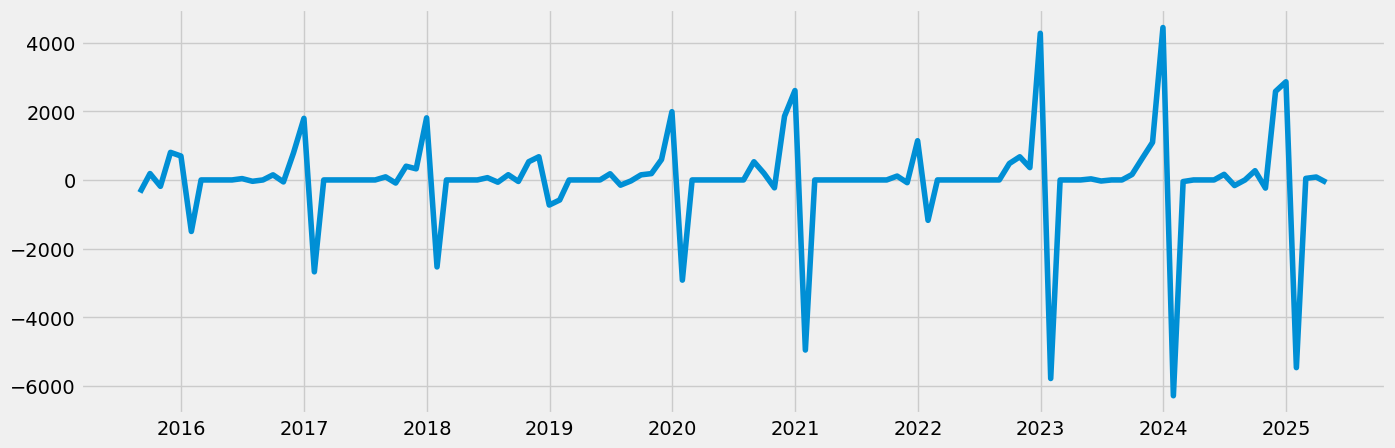

In [152]:
#Checking difference in time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [154]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.347390e+00
p-value                        2.662164e-08
Number of Lags Used            1.100000e+01
Number of Observations Used    1.050000e+02
Critical Value (1%)           -3.494220e+00
Critical Value (5%)           -2.889485e+00
Critical Value (10%)          -2.581676e+00
dtype: float64


##### Interpretation: After performing a stationarizing iteration, the p-value has dropped to 2.66x10^-8, meaning that it is well below the 0.05 significance needed to reject the null hypothesis. There is no root unit in t his differentiated dataset, therefore the stationarization of the times series is complete. 

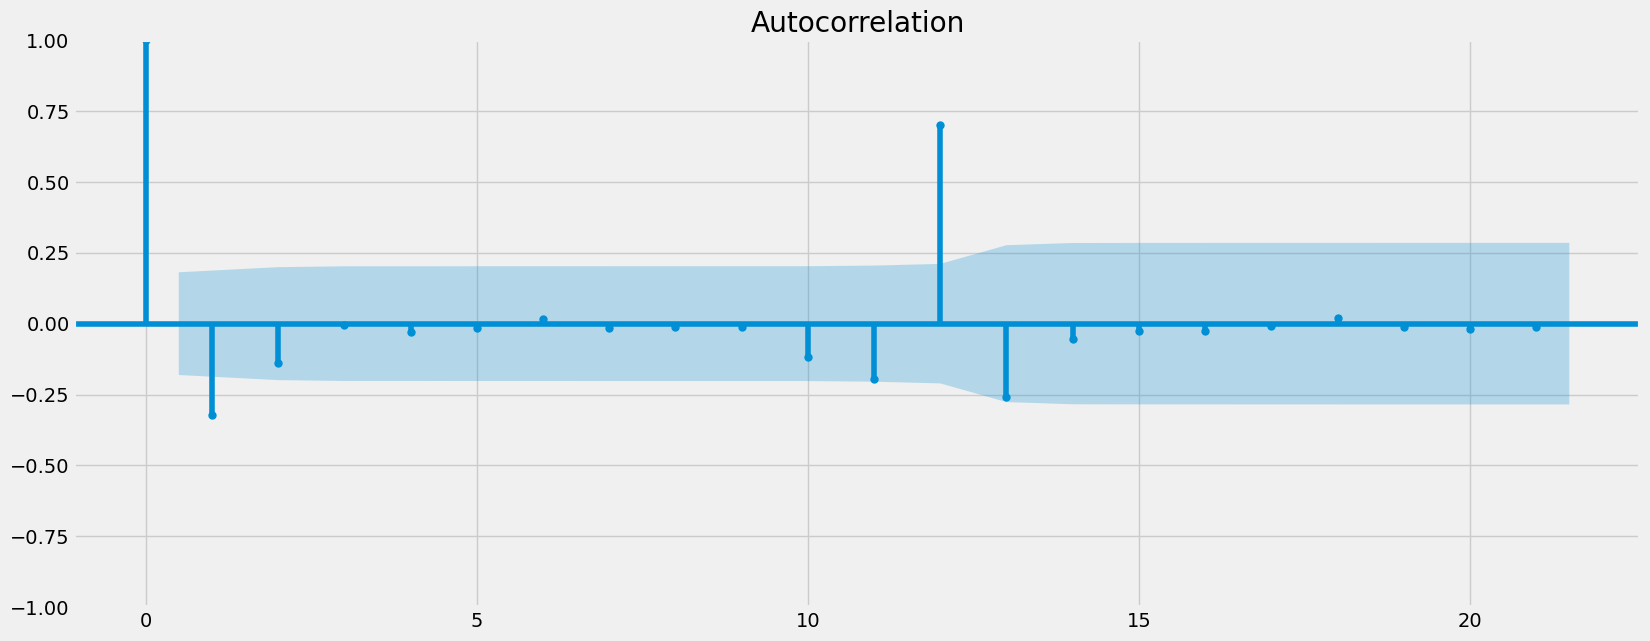

In [156]:
plot_acf(data_diff)
plt.show()

##### Interpretation: Stationarity was achieved. p-value = 2.66x10^-8. Although there are lags that fall out of the confidence interval, there are too few to necessitate another stationarization iteration. 